In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root_dir = "./"
results_dir = os.path.join(root_dir, "results")

# Alternatives are:
# "spleen-unet", "spleen-unetr", "spleen-atunet"
data_to_view = "spleen-unet"

In [3]:
data_96_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-96-1.csv"))
data_96_1["Image_size"] = [96] * 10
data_96_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-96-2.csv"))
data_96_2["Image_size"] = [96] * 10
data_96_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-96-3.csv"))
data_96_3["Image_size"] = [96] * 10

data_80_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-80-1.csv"))
data_80_1["Image_size"] = [80] * 10
data_80_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-80-2.csv"))
data_80_2["Image_size"] = [80] * 10
data_80_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-80-3.csv"))
data_80_3["Image_size"] = [80] * 10

data_64_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-64-1.csv"))
data_64_1["Image_size"] = [64] * 10
data_64_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-64-2.csv"))
data_64_2["Image_size"] = [64] * 10
data_64_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-64-3.csv"))
data_64_3["Image_size"] = [64] * 10

data_48_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-48-1.csv"))
data_48_1["Image_size"] = [48] * 10
data_48_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-48-2.csv"))
data_48_2["Image_size"] = [48] * 10
data_48_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-48-3.csv"))
data_48_3["Image_size"] = [48] * 10

data_32_1 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-32-1.csv"))
data_32_1["Image_size"] = [32] * 10
data_32_2 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-32-2.csv"))
data_32_2["Image_size"] = [32] * 10
data_32_3 = pd.read_csv(os.path.join(results_dir, data_to_view, data_to_view + "-32-3.csv"))
data_32_3["Image_size"] = [32] * 10

combined_frames = [data_96_1, data_96_2, data_96_3, \
                   data_80_1, data_80_2, data_80_3, \
                   data_64_1, data_64_2, data_64_3, \
                   data_48_1, data_48_2, data_48_3, \
                   data_32_1, data_32_2, data_32_3]

combined_df = pd.concat(combined_frames)
combined_df.rename(columns={'Image_size': 'PatchSize'}, inplace=True)

combined_df["fg_group"] = pd.cut(combined_df['fg_ratio'], 
                                 bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5], 
                                 labels=["0", "0.1", "0.2", "0.3",  "0.4"],
                                 include_lowest=True)


visualize_df = combined_df.loc[(combined_df['PatchSize'] == 96) | (combined_df['PatchSize'] == 64) | (combined_df['PatchSize'] == 32)]

In [4]:
fg_ratio_32 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-32.csv"), header=None)
fg_ratio_48 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-48.csv"), header=None)
fg_ratio_64 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-64.csv"), header=None)
fg_ratio_80 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-80.csv"), header=None)
fg_ratio_96 = pd.read_csv(os.path.join(results_dir, data_to_view, "foreground_ratios-96.csv"), header=None)

In [5]:
selected_dice_96 = []
selected_dice_80 = []
selected_dice_64 = []
selected_dice_48 = []
selected_dice_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] > fg_ratio_96.min()[0]) and (row["fg_ratio"] < fg_ratio_96.max()[0]):
         selected_dice_96.append(row["dsc"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] > fg_ratio_80.min()[0]) and (row["fg_ratio"] < fg_ratio_80.max()[0]):
         selected_dice_80.append(row["dsc"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] > fg_ratio_64.min()[0]) and (row["fg_ratio"] < fg_ratio_64.max()[0]):
         selected_dice_64.append(row["dsc"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] > fg_ratio_48.min()[0]) and (row["fg_ratio"] < fg_ratio_48.max()[0]):
         selected_dice_48.append(row["dsc"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] > fg_ratio_32.min()[0]) and (row["fg_ratio"] < fg_ratio_32.max()[0]):
         selected_dice_32.append(row["dsc"])

mean_within_dice_96 = np.nanmean(selected_dice_96)
mean_within_dice_80 = np.nanmean(selected_dice_80)
mean_within_dice_64 = np.nanmean(selected_dice_64)
mean_within_dice_48 = np.nanmean(selected_dice_48)
mean_within_dice_32 = np.nanmean(selected_dice_32)

std_within_dice_96 = np.nanstd(selected_dice_96)
std_within_dice_80 = np.nanstd(selected_dice_80)
std_within_dice_64 = np.nanstd(selected_dice_64)
std_within_dice_48 = np.nanstd(selected_dice_48)
std_within_dice_32 = np.nanstd(selected_dice_32)

print("Dice 96 within:", mean_within_dice_96, " sd: (", std_within_dice_96, ")")
print("Dice 80 within:", mean_within_dice_80, " sd: (", std_within_dice_80, ")")
print("Dice 64 within:", mean_within_dice_64, " sd: (", std_within_dice_64, ")")
print("Dice 48 within:", mean_within_dice_48, " sd: (", std_within_dice_48, ")")
print("Dice 32 within:", mean_within_dice_32, " sd: (", std_within_dice_32, ")")

Dice 96 within: 0.9323112924893697  sd: ( 0.042624348073842806 )
Dice 80 within: 0.9224031368891398  sd: ( 0.04782927422430408 )
Dice 64 within: 0.9282458305358887  sd: ( 0.04096151263728224 )
Dice 48 within: 0.9079854687054952  sd: ( 0.04511459011899329 )
Dice 32 within: 0.7214333633581798  sd: ( 0.130699277229725 )


In [6]:
selected_dice_96 = []
selected_dice_80 = []
selected_dice_64 = []
selected_dice_48 = []
selected_dice_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] <= fg_ratio_96.min()[0]) or (row["fg_ratio"] >= fg_ratio_96.max()[0]):
         selected_dice_96.append(row["dsc"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] <= fg_ratio_80.min()[0]) or (row["fg_ratio"] >= fg_ratio_80.max()[0]):
         selected_dice_80.append(row["dsc"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] <= fg_ratio_64.min()[0]) or (row["fg_ratio"] >= fg_ratio_64.max()[0]):
         selected_dice_64.append(row["dsc"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] <= fg_ratio_48.min()[0]) or (row["fg_ratio"] >= fg_ratio_48.max()[0]):
         selected_dice_48.append(row["dsc"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] <= fg_ratio_32.min()[0]) or (row["fg_ratio"] >= fg_ratio_32.max()[0]):
         selected_dice_32.append(row["dsc"])

mean_outside_dice_96 = np.nanmean(selected_dice_96)
mean_outside_dice_80 = np.nanmean(selected_dice_80)
mean_outside_dice_64 = np.nanmean(selected_dice_64)
mean_outside_dice_48 = np.nanmean(selected_dice_48)
mean_outside_dice_32 = np.nanmean(selected_dice_32)

std_outside_dice_96 = np.nanstd(selected_dice_96)
std_outside_dice_80 = np.nanstd(selected_dice_80)
std_outside_dice_64 = np.nanstd(selected_dice_64)
std_outside_dice_48 = np.nanstd(selected_dice_48)
std_outside_dice_32 = np.nanstd(selected_dice_32)

print("Dice 96 outside:", mean_outside_dice_96, " sd: (", std_outside_dice_96, ")")
print("Dice 80 outside:", mean_outside_dice_80, " sd: (", std_outside_dice_80, ")")
print("Dice 64 outside:", mean_outside_dice_64, " sd: (", std_outside_dice_64, ")")
print("Dice 48 outside:", mean_outside_dice_48, " sd: (", std_outside_dice_48, ")")
print("Dice 32 outside:", mean_outside_dice_32, " sd: (", std_outside_dice_32, ")")

Dice 96 outside: nan  sd: ( nan )
Dice 80 outside: nan  sd: ( nan )
Dice 64 outside: nan  sd: ( nan )
Dice 48 outside: nan  sd: ( nan )
Dice 32 outside: nan  sd: ( nan )


/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2595551068.py:25: RuntimeWarning: Mean of empty slice
  mean_outside_dice_96 = np.nanmean(selected_dice_96)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2595551068.py:26: RuntimeWarning: Mean of empty slice
  mean_outside_dice_80 = np.nanmean(selected_dice_80)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2595551068.py:27: RuntimeWarning: Mean of empty slice
  mean_outside_dice_64 = np.nanmean(selected_dice_64)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2595551068.py:28: RuntimeWarning: Mean of empty slice
  mean_outside_dice_48 = np.nanmean(selected_dice_48)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2595551068.py:29: RuntimeWarning: Mean of empty slice
  mean_outside_dice_32 = np.nanmean(selected_dice_32)
/Users/amithkamath/opt/anaconda3/envs/geomvar-env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees 

In [7]:
selected_hd_96 = []
selected_hd_80 = []
selected_hd_64 = []
selected_hd_48 = []
selected_hd_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] > fg_ratio_96.min()[0]) and (row["fg_ratio"] < fg_ratio_96.max()[0]):
         selected_hd_96.append(row["hausdorff"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] > fg_ratio_80.min()[0]) and (row["fg_ratio"] < fg_ratio_80.max()[0]):
         selected_hd_80.append(row["hausdorff"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] > fg_ratio_64.min()[0]) and (row["fg_ratio"] < fg_ratio_64.max()[0]):
         selected_hd_64.append(row["hausdorff"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] > fg_ratio_48.min()[0]) and (row["fg_ratio"] < fg_ratio_48.max()[0]):
         selected_hd_48.append(row["hausdorff"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] > fg_ratio_32.min()[0]) and (row["fg_ratio"] < fg_ratio_32.max()[0]):
         selected_hd_32.append(row["hausdorff"])

mean_within_hd_96 = np.nanmean(selected_hd_96)
mean_within_hd_80 = np.nanmean(selected_hd_80)
mean_within_hd_64 = np.nanmean(selected_hd_64)
mean_within_hd_48 = np.nanmean(selected_hd_48)
mean_within_hd_32 = np.nanmean(selected_hd_32)

std_within_hd_96 = np.nanstd(selected_hd_96)
std_within_hd_80 = np.nanstd(selected_hd_80)
std_within_hd_64 = np.nanstd(selected_hd_64)
std_within_hd_48 = np.nanstd(selected_hd_48)
std_within_hd_32 = np.nanstd(selected_hd_32)

print("HD 96 within:", mean_within_hd_96, " sd: (", std_within_hd_96, ")")
print("HD 80 within:", mean_within_hd_80, " sd: (", std_within_hd_80, ")")
print("HD 64 within:", mean_within_hd_64, " sd: (", std_within_hd_64, ")")
print("HD 48 within:", mean_within_hd_48, " sd: (", std_within_hd_48, ")")
print("HD 32 within:", mean_within_hd_32, " sd: (", std_within_hd_32, ")")

HD 96 within: 54.46125426398514  sd: ( 65.25926588610662 )
HD 80 within: 91.5999443690887  sd: ( 78.89856478360802 )
HD 64 within: 116.35484622330542  sd: ( 57.87587085321149 )
HD 48 within: 145.05710948242802  sd: ( 38.10207765904942 )
HD 32 within: 167.14991132465718  sd: ( 37.14710142338488 )


In [8]:
selected_hd_96 = []
selected_hd_80 = []
selected_hd_64 = []
selected_hd_48 = []
selected_hd_32 = []

for index in range(len(combined_df)):
   row = combined_df.iloc[index]
   if row["PatchSize"] == 96:
      if (row["fg_ratio"] <= fg_ratio_96.min()[0]) or (row["fg_ratio"] >= fg_ratio_96.max()[0]):
         selected_hd_96.append(row["hausdorff"])
   elif row["PatchSize"] == 80:
      if (row["fg_ratio"] <= fg_ratio_80.min()[0]) or (row["fg_ratio"] >= fg_ratio_80.max()[0]):
         selected_hd_80.append(row["hausdorff"])
   elif row["PatchSize"] == 64:
      if (row["fg_ratio"] <= fg_ratio_64.min()[0]) or (row["fg_ratio"] >= fg_ratio_64.max()[0]):
         selected_hd_64.append(row["hausdorff"])
   elif row["PatchSize"] == 48:
      if (row["fg_ratio"] <= fg_ratio_48.min()[0]) or (row["fg_ratio"] >= fg_ratio_48.max()[0]):
         selected_hd_48.append(row["hausdorff"])
   elif row["PatchSize"] == 32:
      if (row["fg_ratio"] <= fg_ratio_32.min()[0]) or (row["fg_ratio"] >= fg_ratio_32.max()[0]):
         selected_hd_32.append(row["hausdorff"])

mean_outside_hd_96 = np.nanmean(selected_hd_96)
mean_outside_hd_80 = np.nanmean(selected_hd_80)
mean_outside_hd_64 = np.nanmean(selected_hd_64)
mean_outside_hd_48 = np.nanmean(selected_hd_48)
mean_outside_hd_32 = np.nanmean(selected_hd_32)

std_outside_hd_96 = np.nanstd(selected_hd_96)
std_outside_hd_80 = np.nanstd(selected_hd_80)
std_outside_hd_64 = np.nanstd(selected_hd_64)
std_outside_hd_48 = np.nanstd(selected_hd_48)
std_outside_hd_32 = np.nanstd(selected_hd_32)

print("HD 96 outside:", mean_outside_hd_96, " sd: (", std_outside_hd_96, ")")
print("HD 80 outside:", mean_outside_hd_80, " sd: (", std_outside_hd_80, ")")
print("HD 64 outside:", mean_outside_hd_64, " sd: (", std_outside_hd_64, ")")
print("HD 48 outside:", mean_outside_hd_48, " sd: (", std_outside_hd_48, ")")
print("HD 32 outside:", mean_outside_hd_32, " sd: (", std_outside_hd_32, ")")

HD 96 outside: nan  sd: ( nan )
HD 80 outside: nan  sd: ( nan )
HD 64 outside: nan  sd: ( nan )
HD 48 outside: nan  sd: ( nan )
HD 32 outside: nan  sd: ( nan )


/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2052361402.py:25: RuntimeWarning: Mean of empty slice
  mean_outside_hd_96 = np.nanmean(selected_hd_96)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2052361402.py:26: RuntimeWarning: Mean of empty slice
  mean_outside_hd_80 = np.nanmean(selected_hd_80)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2052361402.py:27: RuntimeWarning: Mean of empty slice
  mean_outside_hd_64 = np.nanmean(selected_hd_64)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2052361402.py:28: RuntimeWarning: Mean of empty slice
  mean_outside_hd_48 = np.nanmean(selected_hd_48)
/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/2052361402.py:29: RuntimeWarning: Mean of empty slice
  mean_outside_hd_32 = np.nanmean(selected_hd_32)


Text(0.5, 1.0, 'spleen-unet(Spleen)')

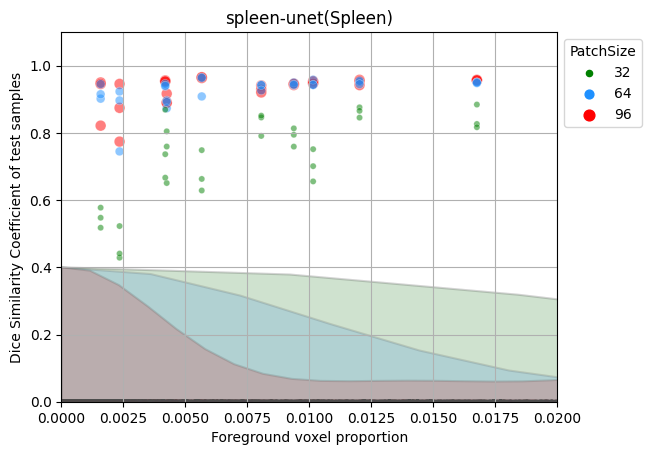

In [9]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax, cut=0, data=fg_ratio_32, palette=["green"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_64, palette=["dodgerblue"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_96, palette=["red"], inner="points", orient="h")
plt.setp(ax.collections, alpha=.2)

#sns.boxplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize",
#                palette=['green','dodgerblue','red'])
#sns.scatterplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize", alpha=0.3,
#                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[30, 50, 70])

sns.scatterplot(ax=ax, data=visualize_df, x="fg_ratio", y="dsc", hue="PatchSize", alpha=0.5, 
                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[20, 40, 60])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 

plt.grid()
plt.ylim([0.0, 1.1])
plt.xlim([0.0, 0.02])
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1.2, step=0.2), labels=["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"])  # Set label locations.
plt.xlabel("Foreground voxel proportion")
plt.ylabel("Dice Similarity Coefficient of test samples")
plt.title(data_to_view + "(Spleen)")

/var/folders/yr/q_0gpqgs1lq_rtbttpk3n9bh0000gn/T/ipykernel_38054/1812158676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visualize_df["hausdorff"] = visualize_df["hausdorff"].div(300.0)


Text(0.5, 1.0, 'spleen-unet(Spleen)')

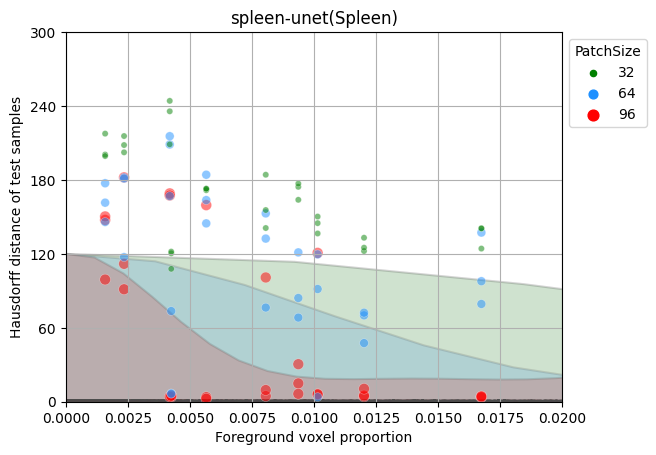

In [10]:
fig, ax = plt.subplots()
sns.violinplot(ax=ax, cut=0, data=fg_ratio_32, palette=["green"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_64, palette=["dodgerblue"], inner="points", orient="h")
sns.violinplot(ax=ax, cut=0, data=fg_ratio_96, palette=["red"], inner="points", orient="h")
plt.setp(ax.collections, alpha=.2)

#sns.boxplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize",
#                palette=['green','dodgerblue','red'])
#sns.scatterplot(ax=ax, data=visualize_df, x="fg_group", y="dsc", hue="PatchSize", alpha=0.3,
#                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[30, 50, 70])
visualize_df["hausdorff"] = visualize_df["hausdorff"].div(300.0)
sns.scatterplot(ax=ax, data=visualize_df, x="fg_ratio", y="hausdorff", hue="PatchSize", alpha=0.5, 
                palette=['green','dodgerblue','red'], size="PatchSize", sizes=[20, 40, 60])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 

plt.grid()
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 0.02])
locs, labels = plt.yticks()  # Get the current locations and labels.
plt.yticks(np.arange(0, 1.2, step=0.2), labels=["0", "60", "120", "180", "240", "300"])  # Set label locations.
plt.xlabel("Foreground voxel proportion")
plt.ylabel("Hausdorff distance of test samples")
plt.title(data_to_view + "(Spleen)")